C:\Users\Quinns\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


A1:  41.04888376825299
B1:  0.0125 [constant]
C1:  1.2438671739037408
Optimal solution: [41.04888376825299, 1.2438671739037408]
Objective function value: 36.61532704019821
Evolutionary process of the objective function value:


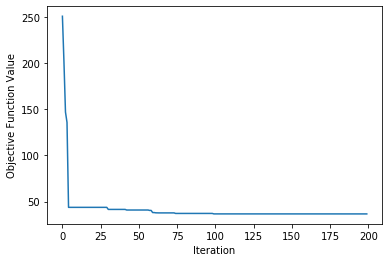

In [5]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

# Region 1
SG_g = 0.979999
API = 55.9999
SG_o = 141.5/(API+131.5)
T = 588.67 #Rankine

def objective_function(x):
    data_csv = pd.read_csv('Data_Lapangan_Fidelia.csv')
    Pressure = data_csv['Pressure_1']
    Rs_real = data_csv['Rs_1']
    Bo_real = data_csv['Bo_1']
    fobj = 0
    for i in range (0,len(Pressure)):
        fobj += abs(Rs_real[i]-SG_g*((Pressure[i]/x[0]+1.4)*(10**(0.0125*API-0.00091*(T-460))))**x[1])
    return fobj

    
bounds=[(0,100),(0,4)]   # upper and lower bounds of variables 
nv = 2                   # number of variables
 
particle_size=300        # number of particles
iterations=200           # max number of iterations
w=0.9                    # inertia constant
c1=1.49618               # cognative constant
c2=c1                    # social constant
  
class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position=initial_fitness             # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0],bounds[i][1])) # generate random initial position
            self.particle_velocity.append(random.uniform(-1,1)) # generate random initial velocity
 
    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)

        if self.fitness_particle_position < self.fitness_local_best_particle_position:
            self.local_best_particle_position=self.particle_position                  # update the local best
            self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best
    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
 
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
 
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i]=bounds[i][0]

                
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
 
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
 
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
         
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                    global_best_particle_position = list(swarm_particle[j].particle_position)
                    fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)

            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
                 
            A.append(fitness_global_best_particle_position) # record the best fitness
             
        print('A1: ', global_best_particle_position[0])
        print('B1:  0.0125 [constant]')
        print('C1: ', global_best_particle_position[1])
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')
        plt.xlabel('Iteration') 
        plt.ylabel('Objective Function Value')
        plt.plot(A)
#------------------------------------------------------------------------------

initial_fitness = float("inf") # for minimization problem       
PSO(objective_function,bounds,particle_size,iterations)

C:\Users\Quinns\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


A1:  23.58109215037849
B1:  0.0125 [constant]
C1:  1.2129253954628954
Optimal solution: [23.58109215037849, 1.2129253954628954]
Objective function value: 9.124130457232646
Evolutionary process of the objective function value:


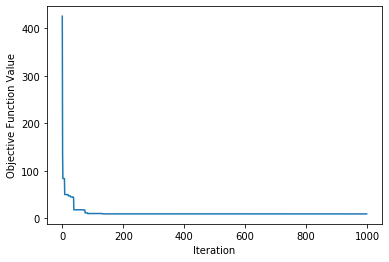

In [10]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

# Region 2
SG_g = 0.81
API = 54.0001
SG_o = 141.5/(API+131.5)
T = 612.27 #Rankine

def objective_function(x):
    data_csv = pd.read_csv('Data_Lapangan_Fidelia.csv')
    Pressure = data_csv['Pressure_2']
    Rs_real = data_csv['Rs_2']
    Bo_real = data_csv['Bo_2']
    fobj = 0
    for i in range (0,len(Pressure)):
        fobj += abs(Rs_real[i]-SG_g*((Pressure[i]/x[0]+1.4)*(10**(0.0125*API-0.00091*(T-460))))**x[1])
    return fobj

    
bounds=[(0,50),(0,4)]   # upper and lower bounds of variables 
nv = 2                   # number of variables
 
particle_size=300        # number of particles
iterations=1000           # max number of iterations
w=0.9                    # inertia constant
c1=1.49618                 # cognative constant
c2=c1                    # social constant
  
class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position=initial_fitness             # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0],bounds[i][1])) # generate random initial position
            self.particle_velocity.append(random.uniform(-1,1)) # generate random initial velocity
 
    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        
        if self.fitness_particle_position < self.fitness_local_best_particle_position:
            self.local_best_particle_position=self.particle_position                  # update the local best
            self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best

    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
 
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
 
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i]=bounds[i][0]
                 
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
 
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
 
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
         
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                    global_best_particle_position = list(swarm_particle[j].particle_position)
                    fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)

            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
                 
            A.append(fitness_global_best_particle_position) # record the best fitness
             
        print('A1: ', global_best_particle_position[0])
        print('B1:  0.0125 [constant]')
        print('C1: ', global_best_particle_position[1])
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')
        plt.xlabel('Iteration') 
        plt.ylabel('Objective Function Value')
        plt.plot(A)
#------------------------------------------------------------------------------

initial_fitness = float("inf") # for minimization problem       
PSO(objective_function,bounds,particle_size,iterations)

C:\Users\Quinns\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


A1:  51.220837874182365
B1:  0.0125 [constant]
C1:  1.2614080394698721
Optimal solution: [51.220837874182365, 1.2614080394698721]
Objective function value: 42.51005560787809
Evolutionary process of the objective function value:


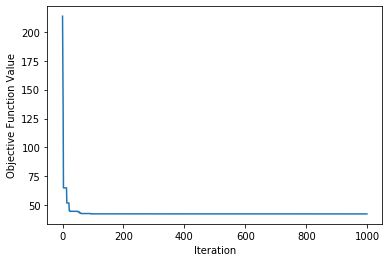

In [12]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

# Region 3
SG_g = 0.979999
API = 55.9999
SG_o = 141.5/(API+131.5)
T = 612.27 #Rankine

def objective_function(x):
    data_csv = pd.read_csv('Data_Lapangan_Fidelia.csv')
    Pressure = data_csv['Pressure_3']
    Rs_real = data_csv['Rs_3']
    Bo_real = data_csv['Bo_3']
    fobj = 0
    for i in range (0,len(Pressure)):
        fobj += abs(Rs_real[i]-SG_g*((Pressure[i]/x[0]+1.4)*(10**(0.0125*API-0.00091*(T-460))))**x[1])
    return fobj

    
bounds=[(0,100),(0,4)]   # upper and lower bounds of variables 
nv = 2                   # number of variables
 
particle_size=300        # number of particles
iterations=1000           # max number of iterations
w=0.9                    # inertia constant
c1=1.49618                 # cognative constant
c2=c1                    # social constant
   
class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position=initial_fitness             # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0],bounds[i][1])) # generate random initial position
            self.particle_velocity.append(random.uniform(-1,1)) # generate random initial velocity
 
    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        
        if self.fitness_particle_position < self.fitness_local_best_particle_position:
            self.local_best_particle_position=self.particle_position                  # update the local best
            self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best

    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
 
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
 
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i]=bounds[i][0]
                 
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
 
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
 
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
         
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                    global_best_particle_position = list(swarm_particle[j].particle_position)
                    fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)

            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
                 
            A.append(fitness_global_best_particle_position) # record the best fitness
             
        print('A1: ', global_best_particle_position[0])
        print('B1:  0.0125 [constant]')
        print('C1: ', global_best_particle_position[1])
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')
        plt.xlabel('Iteration') 
        plt.ylabel('Objective Function Value')
        plt.plot(A)
#------------------------------------------------------------------------------
initial_fitness = float("inf") # for minimization problem        
PSO(objective_function,bounds,particle_size,iterations)

C:\Users\Quinns\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


A1:  18.132738998613274
B1:  0.0125 [constant]
C1:  1.204725236000283
Optimal solution: [18.132738998613274, 1.204725236000283]
Objective function value: 0.09287761077940893
Evolutionary process of the objective function value:


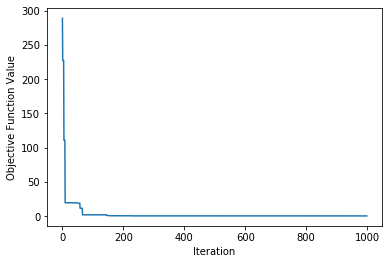

In [14]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

# Region 4
SG_g = 0.75
API = 43.4999
SG_o = 141.5/(API+131.5)
T = 612.27 #Rankine

def objective_function(x):
    data_csv = pd.read_csv('Data_Lapangan_Fidelia.csv')
    Pressure = data_csv['Pressure_4']
    Rs_real = data_csv['Rs_4']
    Bo_real = data_csv['Bo_4']
    fobj = 0
    for i in range (0,len(Pressure)):
        fobj += abs(Rs_real[i]-SG_g*((Pressure[i]/x[0]+1.4)*(10**(0.0125*API-0.00091*(T-460))))**x[1])
    return fobj

    
bounds=[(0,50),(0,4)]   # upper and lower bounds of variables 
nv = 2                   # number of variables
mm = -1                   # if minimization problem, mm = -1; if maximization problem, mm = 1
 

particle_size=300        # number of particles
iterations=1000           # max number of iterations
w=0.9                    # inertia constant
c1=1.49618                 # cognative constant
c2=c1                    # social constant
  
class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position=initial_fitness             # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0],bounds[i][1])) # generate random initial position
            self.particle_velocity.append(random.uniform(-1,1)) # generate random initial velocity
 
    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        
        if self.fitness_particle_position < self.fitness_local_best_particle_position:
            self.local_best_particle_position=self.particle_position                  # update the local best
            self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best

    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
 
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
 
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i]=bounds[i][0]

                
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
 
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
 
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
         
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                    global_best_particle_position = list(swarm_particle[j].particle_position)
                    fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)

            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
                 
            A.append(fitness_global_best_particle_position) # record the best fitness
             
        print('A1: ', global_best_particle_position[0])
        print('B1:  0.0125 [constant]')
        print('C1: ', global_best_particle_position[1])
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')
        plt.xlabel('Iteration') 
        plt.ylabel('Objective Function Value')
        plt.plot(A)
#------------------------------------------------------------------------------

initial_fitness = float("inf") # for minimization problem       
PSO(objective_function,bounds,particle_size,iterations)

C:\Users\Quinns\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


A1:  40.86621731477191
C1:  1.2433170963298772
Optimal solution: [40.86621731477191, 1.2433170963298772]
Objective function value: 36.37281404094784
Evolutionary process of the objective function value:


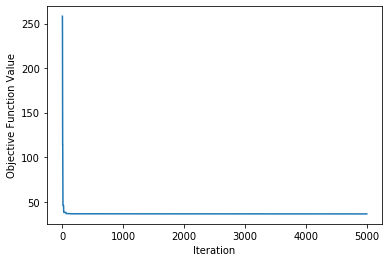

In [45]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

#------------------------------------------------------------------------------
# TO CUSTOMIZE THIS PSO CODE TO SOLVE UNCONSTRAINED OPTIMIZATION PROBLEMS, CHANGE THE PARAMETERS IN THIS SECTION ONLY:
# THE FOLLOWING PARAMETERS MUST BE CHANGED.

# Region 1
SG_g = 0.979999
API = 55.9999
SG_o = 141.5/(API+131.5)
T = 589.67

def objective_function(x):
    data_csv = pd.read_csv('Data_Lapangan_Fidelia.csv')
    Pressure = data_csv['Pressure_1']
    Rs_real = data_csv['Rs_1']
    Bo_real = data_csv['Bo_1']
    fobj = 0
    for i in range (0,len(Pressure)):
        fobj += abs(Rs_real[i]-SG_g*((Pressure[i]/x[0]+1.4)*(10**(0.0125*API-0.00091*(T-460))))**x[1])
    return fobj

    
bounds=[(0,100),(0,4)]   # upper and lower bounds of variables 
nv = 2                   # number of variables
mm = -1                   # if minimization problem, mm = -1; if maximization problem, mm = 1
 
# THE FOLLOWING PARAMETERS ARE OPTINAL.
particle_size=300        # number of particles
iterations=5000           # max number of iterations
w=0.9                    # inertia constant
c1=1.49618               # cognative constant
c2=c1                    # social constant
# END OF THE CUSTOMIZATION SECTION
#------------------------------------------------------------------------------    
class Particle:
    def __init__(self,bounds):
        self.particle_position=[]                     # particle position
        self.particle_velocity=[]                     # particle velocity
        self.local_best_particle_position=[]          # best position of the particle
        self.fitness_local_best_particle_position= initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position=initial_fitness             # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(random.uniform(bounds[i][0],bounds[i][1])) # generate random initial position
            self.particle_velocity.append(random.uniform(-1,1)) # generate random initial velocity
 
    def evaluate(self,objective_function):
        self.fitness_particle_position=objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position=self.particle_position                  # update the local best
                self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position=self.particle_position                  # update the local best
                self.fitness_local_best_particle_position=self.fitness_particle_position  # update the fitness of the local best
 
    def update_velocity(self,global_best_particle_position):
        for i in range(nv):
            r1=random.random()
            r2=random.random()
 
            cognitive_velocity = c1*r1*(self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2*r2*(global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w*self.particle_velocity[i]+ cognitive_velocity + social_velocity
 
    def update_position(self,bounds):
        for i in range(nv):
            self.particle_position[i]=self.particle_position[i]+self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i]>bounds[i][1]:
                self.particle_position[i]=bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i]=bounds[i][0]

# def rs(B1,C1):
#     y = SG_g*((2405/((Rs_experimental/(SG_g*10**(B1*SG_o-0.00091*(T-460))))**C1)+1.4)*(10**(B1*SG_o-0.00091*(T-460))))**C1
#     return y

                 
class PSO():
    def __init__(self,objective_function,bounds,particle_size,iterations):
 
        fitness_global_best_particle_position=initial_fitness
        global_best_particle_position=[]
 
        swarm_particle=[]
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A=[]
         
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if mm ==-1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm ==1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
                 
            A.append(fitness_global_best_particle_position) # record the best fitness
             
        print('A1: ', global_best_particle_position[0])
        print('C1: ', global_best_particle_position[1])
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
        print('Evolutionary process of the objective function value:')
        plt.xlabel('Iteration') 
        plt.ylabel('Objective Function Value') 
        plt.plot(A)
#         print(A)
#------------------------------------------------------------------------------
if mm == -1:
    initial_fitness = float("inf") # for minimization problem
if mm == 1:
    initial_fitness = -float("inf") # for maximization problem
#------------------------------------------------------------------------------   
# Main PSO         
PSO(objective_function,bounds,particle_size,iterations)

In [34]:
import csv
import numpy
import json
import pandas as pd


data =[]
with open('fungsi_objektif_Rs.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    #line split diisi dengan delimiter (pemisah dari tiap karakter)
    lines = (line.split(",") for line in stripped if line)
    data = list(lines)
a = numpy.asarray(data)

result =[]
#proses ulang data karena panjang tiap array yang dihasilkan berbeda2 (konsekuensi dari extract data txt)
for i in range(0,len(a)):
    
    for j in range(0,len(a[i])) :
        if a[i][j] != '' :
            result.append(float(a[i][j]))
#     print(len(temp))
 

porosity = {'Fobjective': result
        }

df = pd.DataFrame(porosity, columns= ['Fobjective'])

df.to_csv('logRs.csv',index=None,header=True)